## Retorno e risco

**Carregando** as bibliotecas

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML   #ipython
display(HTML("<style>.container { width:100% !important; }</style>"))
import statsmodels.api as sm

Especificando datas e Ibovespa

In [ ]:
# Datas
start = datetime.datetime(2020, 1, 2)
end = datetime.datetime(2024, 11, 11)

## Ibovespa
bvsp = yf.download('^BVSP', start=start, end=end)

# Visualizando datas específicas
bvsp.head(3)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP
Date,,,,,,
2020-01-02 00:00:00+00:00,118573.00,118573.00,118573.00,115649.00,115652.00,5162700
2020-01-03 00:00:00+00:00,117707.00,117707.00,118792.00,117341.00,118564.00,6834500
2020-01-06 00:00:00+00:00,116878.00,116878.00,117707.00,116269.00,117707.00,6570000


Visualizando os preços

Text(0.5, 1.0, 'Ibovespa - Preço')

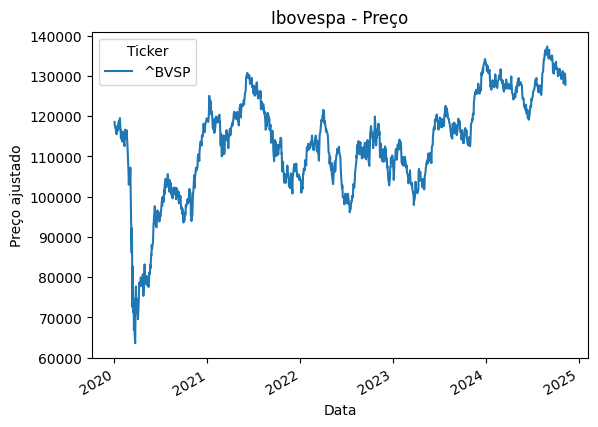

In [ ]:
bvsp['Adj Close'].plot()
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.title("Ibovespa - Preço")

Calculando retornos diários e mensais

In [ ]:
bvsp_daily_returns = bvsp['Adj Close'].pct_change()
bvsp_monthly_returns = bvsp['Adj Close'].resample('M').ffill().pct_change()

<ipython-input-45-236a622e9153>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bvsp_monthly_returns = bvsp['Adj Close'].resample('M').ffill().pct_change()


Visualizando os retornos diários

Text(0.5, 1.0, 'Ibovespa - Retornos Diários')

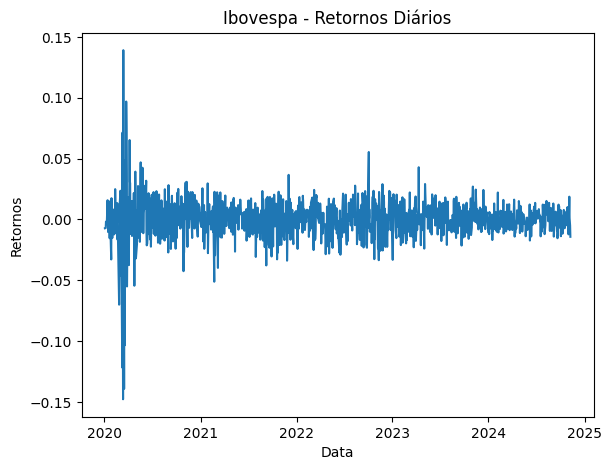

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(bvsp_daily_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retornos")
ax1.set_title("Ibovespa - Retornos Diários")

Visualizando os retornos mensais

Text(0.5, 1.0, 'Ibovespa - Retornos mensais')

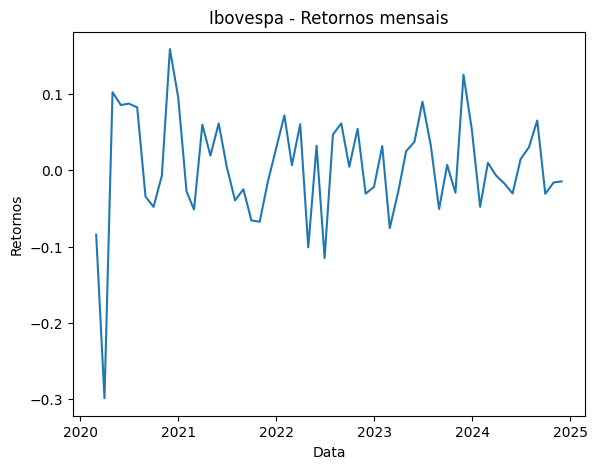

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(bvsp_monthly_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retornos")
ax1.set_title("Ibovespa - Retornos mensais")

O histograma dos retornos diários

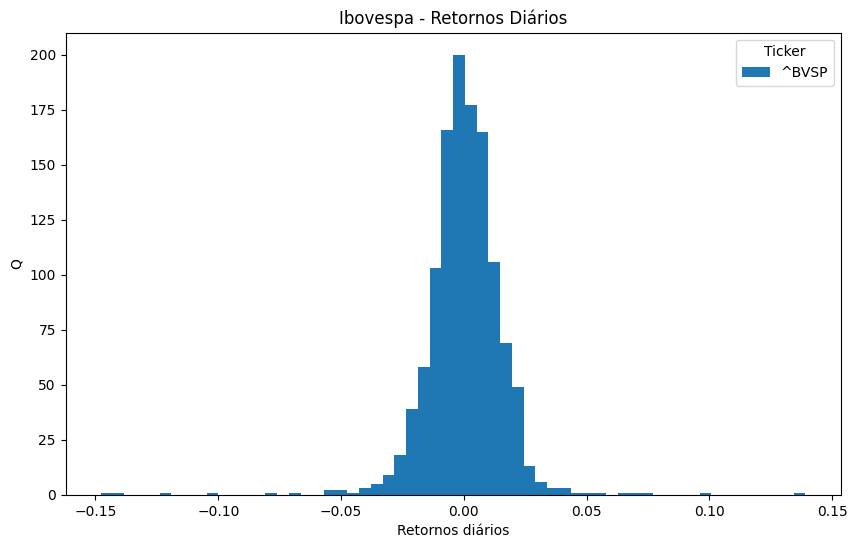

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))  # Define o tamanho da figura

bvsp_daily_returns.plot.hist(bins=60, ax=ax1)  # Define o eixo para o histograma
ax1.set_xlabel("Retornos diários")
ax1.set_ylabel("Q")
ax1.set_title("Ibovespa - Retornos Diários")

plt.show()

Vejamos o mesmo tratamento, agora para uma ação qualquer

In [ ]:
# Ação
acao = yf.download('PETR4.SA', start=start, end=end)

# Visualizando
acao.head(3)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,,
2020-01-02 00:00:00+00:00,10.62,30.70,30.70,30.31,30.51,37774500
2020-01-03 00:00:00+00:00,10.53,30.45,31.24,30.45,30.88,71595600
2020-01-06 00:00:00+00:00,10.66,30.81,30.94,29.95,30.43,81844000


Plot dos preços

Text(0.5, 1.0, 'Ação - Preço')

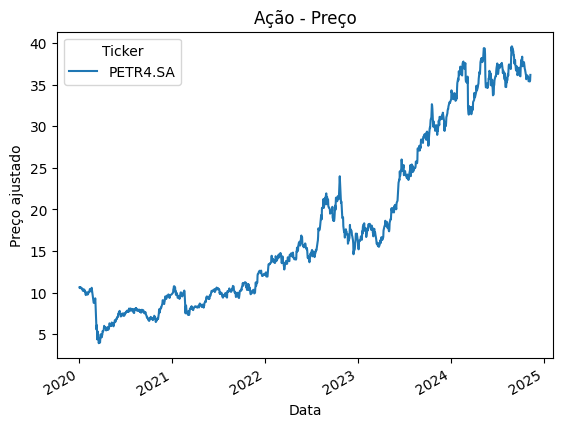

In [ ]:
acao['Adj Close'].plot()
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.title("Ação - Preço")

Cálculo dos retornos diários e mensais

In [ ]:
acao_daily_returns = acao['Adj Close'].pct_change()
acao_monthly_returns = acao['Adj Close'].resample('M').ffill().pct_change()

<ipython-input-51-dc4a44e0db10>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  acao_monthly_returns = acao['Adj Close'].resample('M').ffill().pct_change()


Plot dos retornos diários

Text(0.5, 1.0, 'Ação - Retornos Diários')

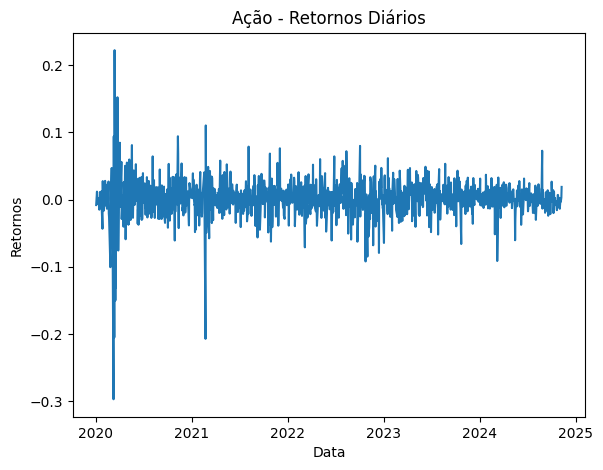

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(acao_daily_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retornos")
ax1.set_title("Ação - Retornos Diários")

Plot dos retornos mensais

Text(0.5, 1.0, 'Ação - Retornos Mensais')

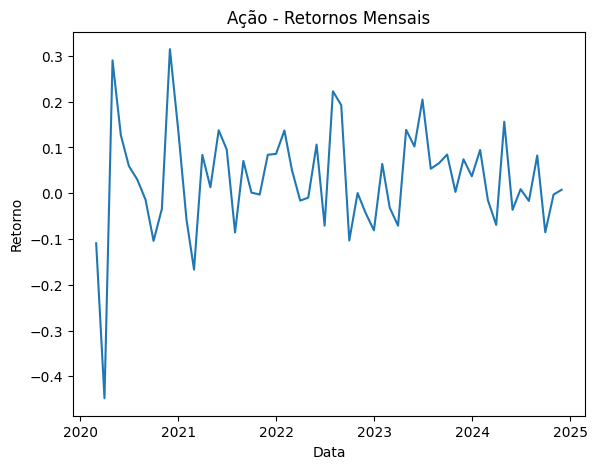

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(acao_monthly_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retorno")
ax1.set_title("Ação - Retornos Mensais")

Plot do histograma

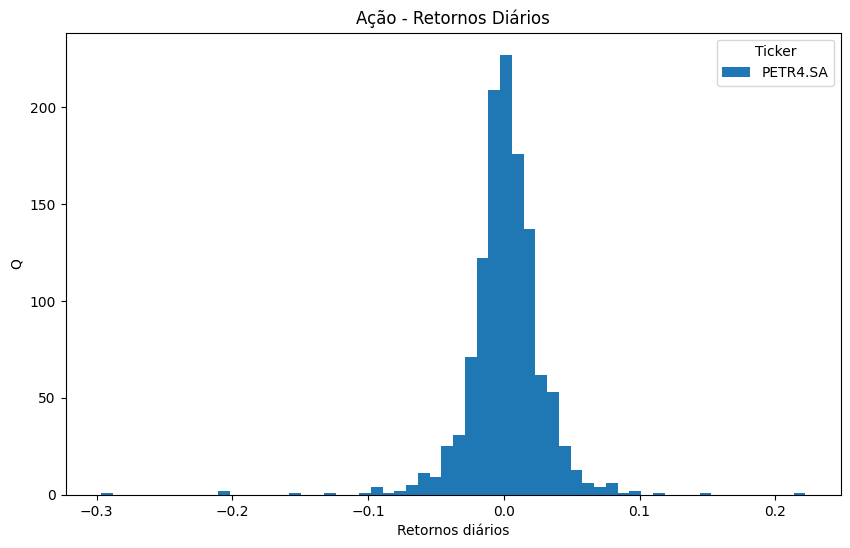

In [ ]:
# Gerando o gráfico de histograma corretamente
fig, ax1 = plt.subplots(figsize=(10, 6))  # Define o tamanho da figura

acao_daily_returns.plot.hist(bins=60, ax=ax1)  # Usa o eixo ax1 para o histograma
ax1.set_xlabel("Retornos diários")
ax1.set_ylabel("Q")
ax1.set_title("Ação - Retornos Diários")

plt.show()


## Modelo linear de um fator

Primeiro um plot

<ipython-input-55-37b93e84c358>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ibovret = bvsp_monthly_returns.fillna(method='ffill')
<ipython-input-55-37b93e84c358>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  acaoret = acao_monthly_returns.fillna(method='ffill')


Text(0.5, 1.0, 'Scatter Plot Ação x Ibovespa')

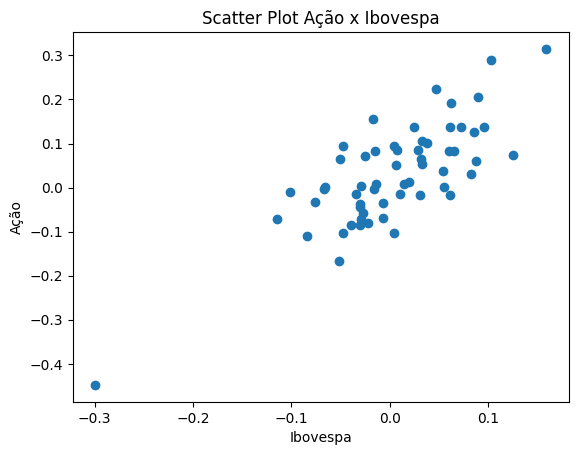

In [ ]:
ibovret = bvsp_monthly_returns.fillna(method='ffill')
acaoret = acao_monthly_returns.fillna(method='ffill')

plt.scatter(ibovret, acaoret)
plt.xlabel('Ibovespa')
plt.ylabel('Ação')
plt.title('Scatter Plot Ação x Ibovespa')

A regressão linear simples

In [ ]:
# Adicionar constante para o intercepto
X = sm.add_constant(ibovret)  # Adiciona uma coluna de 1s para o intercepto
y = acaoret  # Variável dependente

# Remover a primeira linha de X e y
X = X.iloc[1:]  # Remove a primeira linha de X
y = y.iloc[1:]  # Remove a primeira linha de y

# Ajuste do modelo OLS
model = sm.OLS(y, X)
results = model.fit()

# Exibir o resumo da regressão
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               PETR4.SA   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     88.58
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           3.92e-13
Time:                        11:53:42   Log-Likelihood:                 69.825
No. Observations:                  58   AIC:                            -135.7
Df Residuals:                      56   BIC:                            -131.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0240      0.010      2.468      0.0